In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'c:\Users\Admin\Desktop\Dataset\car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())
print(df.Fuel_Type.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [5]:
## check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
#Creating new column no of years
df['No.of Years'] = 2022 - df.Year

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No.of Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [13]:
df = df.drop('Year', axis=1)
df = df.drop('Car_Name', axis=1)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No.of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [15]:
# One-Hot encoding

df = pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [16]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,8.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,8.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,3.000000,19.000000,1.000000,1.000000,1.000000,1.000000


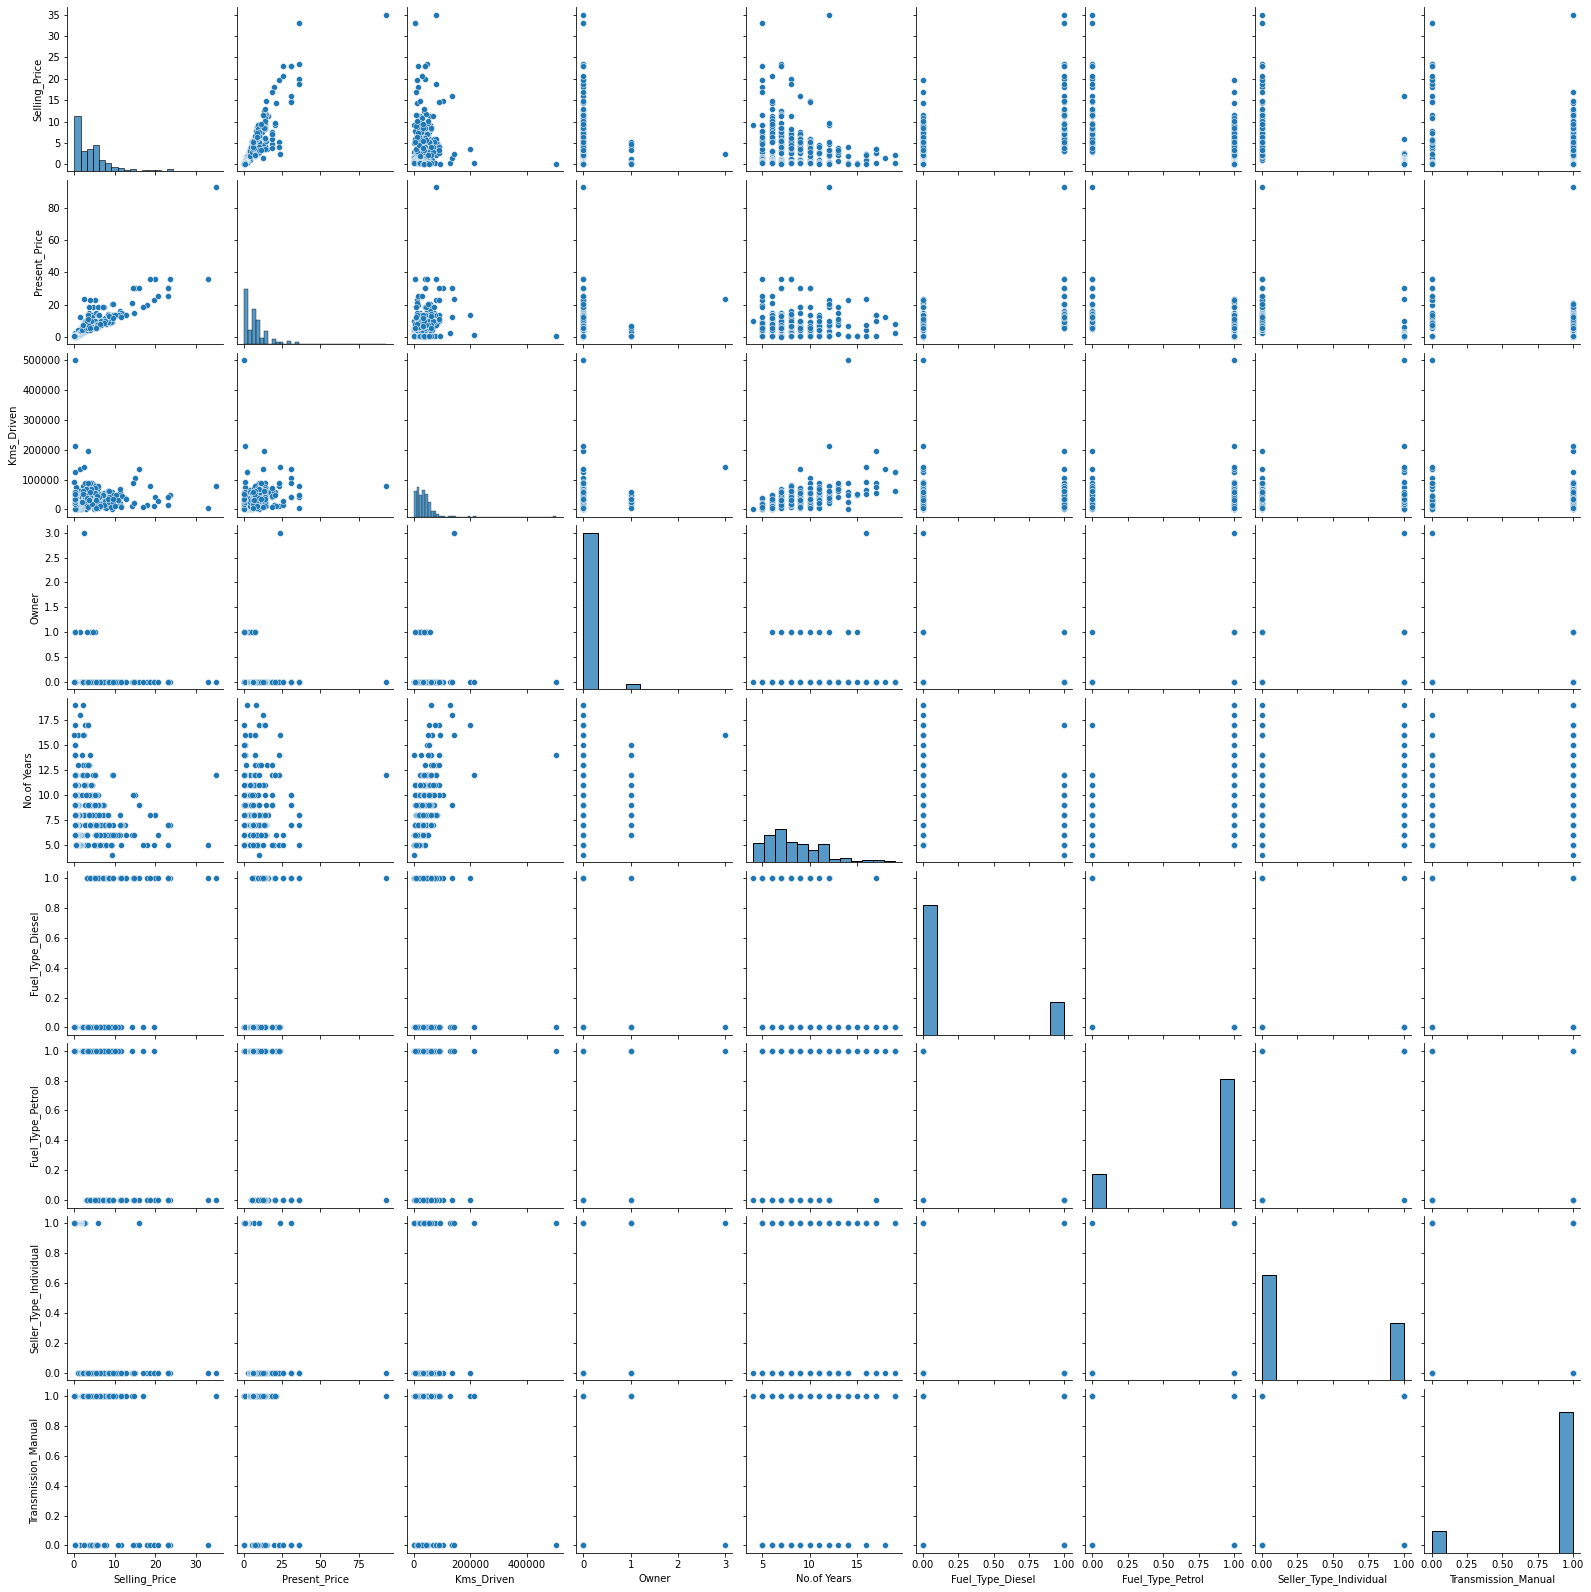

In [17]:
sns.pairplot(df)

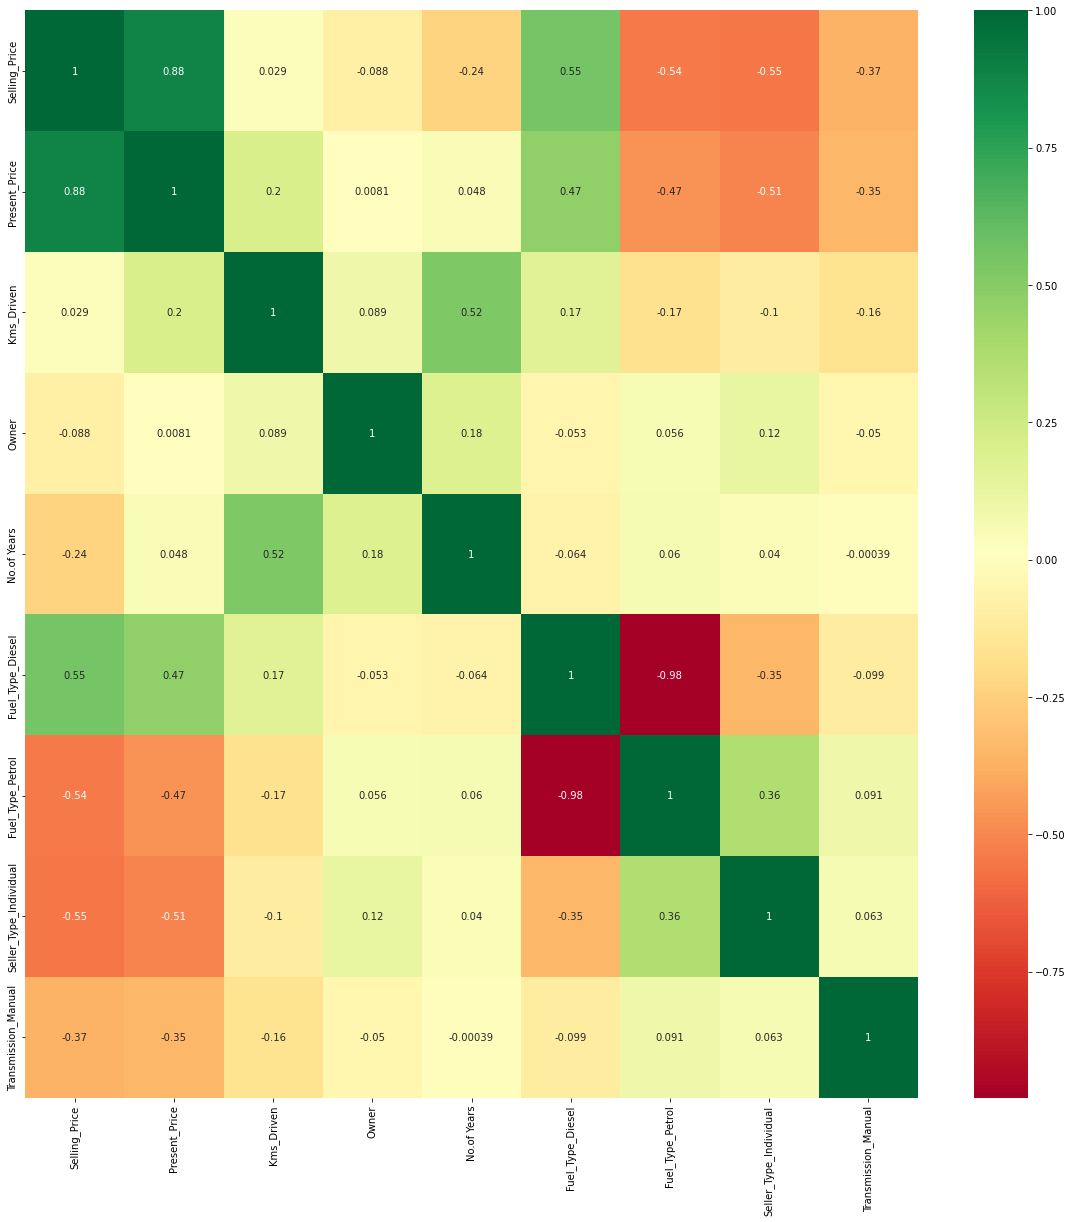

In [18]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot the heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [19]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [20]:
X.head()

,Present_Price,Kms_Driven,Owner,No.of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [21]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [22]:
### Feature importance

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)

[3.87067293e-01 4.00455287e-02 3.85831557e-04 7.56153331e-02
 2.23131581e-01 1.58210552e-02 1.24904703e-01 1.33028674e-01]


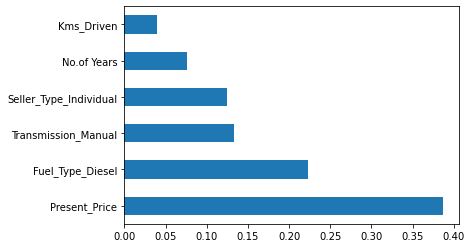

In [24]:
# Plot graph for better feature importance visualization

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(6).plot(kind='barh')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
print(X_train.shape)
print(X_test.shape)

(240, 8)
(61, 8)


In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [28]:
# Hyper-parameters

#number of tress for random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Create random grid
random_grid = {
                'n_estimators': n_estimators,
                'max_features' :max_features,
                'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                'min_samples_leaf': min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
# Create base model and the tune it on the hypr-parameters

rf = RandomForestRegressor()

In [31]:
# Use random grid to search for the best hyperparameters

rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose=1, random_state=100)

In [32]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=1)

In [33]:
predictions = rf_random.predict(X_test)
predictions

array([ 4.92988182,  4.79577273,  1.16376364,  6.73603636, 21.52458182,
        1.6258    ,  6.05113636,  1.05359091,  0.50059091,  0.52385455,
        1.11108182,  0.43217273,  1.01687273,  5.31913636,  0.58903636,
        9.60020909,  0.17406364,  2.93990909,  0.59898182,  2.87709091,
        0.32337273,  4.39127273,  9.97964545,  6.30722727,  0.31040909,
        0.29762727,  0.82024545,  6.17886364, 13.28095455,  3.58727273,
        3.84065455,  0.7189    ,  1.60072727,  2.12853636, 22.00639091,
        1.20522727,  2.47731818,  7.50653636,  0.45763636,  3.65633636,
        0.34824545,  7.69420909,  6.18067273,  7.50817273, 15.88013636,
       10.63138182,  4.80472727, 18.0892    ,  2.94251818,  4.71790909,
       16.39530909,  0.47402727,  0.2884    ,  0.466     ,  0.61889091,
        2.47427273,  3.42968182,  0.13945455,  0.32974545,  8.58950909,
        0.18381818])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

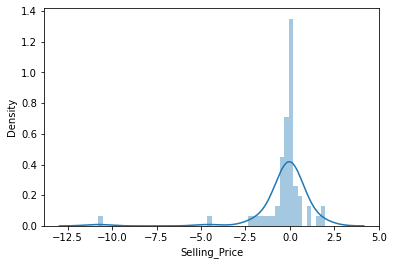

In [34]:
sns.distplot(y_test-predictions)

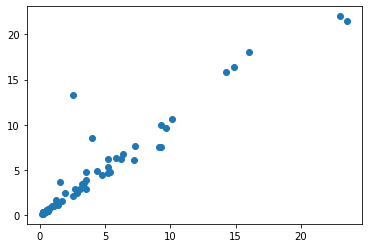

In [35]:
plt.scatter(y_test, predictions)

In [36]:
import pickle

file = open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random, file)